In [4]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os


import colorsys
from General.segments import SEGMENT_INDEX
from matplotlib.colors import ListedColormap


base_dir = r'/data/xiangcen/pet_gen/processed/debug'
patient = 'patient_0035'
psma_ct_path = os.path.join(base_dir, patient, 'psma_ct.nii.gz')
fdg_ct_path = os.path.join(base_dir, patient, 'fdg_ct.nii.gz')



# Read ITK images
psma_ct = sitk.ReadImage(psma_ct_path)
fdg_ct = sitk.ReadImage(fdg_ct_path)



# Convert to NumPy arrays (z, y, x)
psma_ct = sitk.GetArrayFromImage(psma_ct)
fdg_ct = sitk.GetArrayFromImage(fdg_ct)


In [5]:
# Choose slice index (along z)
slice_idx = psma_ct.shape[1] // 2  # middle slice
slice_idx = 90

psma_ct = psma_ct[:, slice_idx, :]
fdg_ct = fdg_ct[:, slice_idx, :]



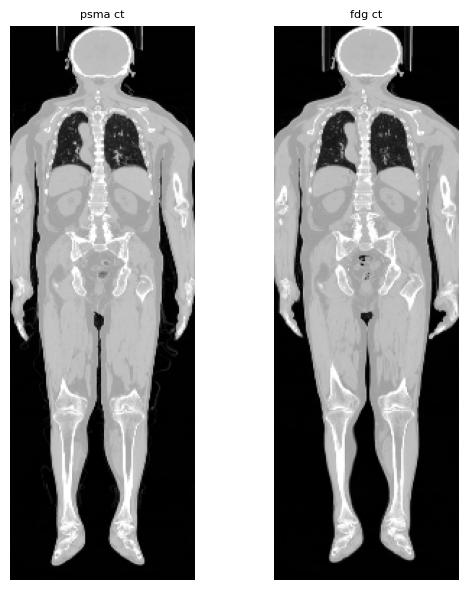

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(6, 6))  # 1 row, 6 columns
# fig.suptitle(hp_name, fontsize=14)  # slightly smaller overall title

# Column 1: Fixed PET
axes[0].imshow(np.rot90(psma_ct, k=2), cmap="gray")
axes[0].set_title("psma ct", fontsize=8)
axes[0].axis("off")

# Column 2: Warped Moving PET
axes[1].imshow(np.rot90(fdg_ct, k=2), cmap="gray")
axes[1].set_title("fdg ct", fontsize=8)
axes[1].axis("off")

plt.tight_layout()
plt.show()